In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg

In [2]:
df=pd.read_csv("LMData.csv") 
df


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m
0,RGI2000-v7.0-G-01-00001,1,01-01,G204091E67414N,392889,624,2008-09-02T00:00:00,-155.909404,67.413726,5,...,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,COPDEM30,725
1,RGI2000-v7.0-G-01-00002,1,01-01,G204121E67419N,392890,624,2008-09-02T00:00:00,-155.879114,67.419232,5,...,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,COPDEM30,484
2,RGI2000-v7.0-G-01-00003,1,01-01,G204471E67431N,392897,624,2008-09-02T00:00:00,-155.530786,67.431484,5,...,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,COPDEM30,1099
3,RGI2000-v7.0-G-01-00004,1,01-01,G204497E67431N,392899,624,2008-09-02T00:00:00,-155.501948,67.430514,5,...,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,COPDEM30,652
4,RGI2000-v7.0-G-01-00005,1,01-01,G204521E67429N,392901,624,2008-09-02T00:00:00,-155.478173,67.432873,5,...,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,COPDEM30,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,RGI2000-v7.0-G-01-27505,1,01-06,G232055E58382N,419220,624,2005-08-15T00:00:00,-127.943494,58.381563,9,...,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,COPDEM30,757
27505,RGI2000-v7.0-G-01-27506,1,01-06,G232006E58375N,419219,624,2005-08-15T00:00:00,-127.994907,58.374932,9,...,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,COPDEM30,915
27506,RGI2000-v7.0-G-01-27507,1,01-06,G231997E58381N,419218,624,2005-08-15T00:00:00,-128.003487,58.380406,9,...,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,COPDEM30,714
27507,RGI2000-v7.0-G-01-27508,1,01-06,G231855E58382N,419215,624,2005-08-15T00:00:00,-128.146532,58.381816,9,...,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,COPDEM30,489


## Correlation matrix attempt
Clean up data by dropping unecessary columns
Create new dataframe with filtered data

In [3]:
# what data types are there in the csv?
df.dtypes

rgi_id         object
o1region        int64
o2region       object
glims_id       object
anlys_id        int64
subm_id         int64
src_date       object
cenlon        float64
cenlat        float64
utm_zone        int64
area_km2      float64
primeclass      int64
conn_lvl        int64
surge_type      int64
term_type       int64
glac_name      object
is_rgi6         int64
termlon       float64
termlat       float64
zmin_m        float64
zmax_m        float64
zmed_m        float64
zmean_m       float64
slope_deg     float64
aspect_deg    float64
aspect_sec      int64
dem_source     object
lmax_m          int64
dtype: object

In [4]:
# select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df
numeric_df.columns


Index(['o1region', 'anlys_id', 'subm_id', 'cenlon', 'cenlat', 'utm_zone',
       'area_km2', 'primeclass', 'conn_lvl', 'surge_type', 'term_type',
       'is_rgi6', 'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m',
       'zmean_m', 'slope_deg', 'aspect_deg', 'aspect_sec', 'lmax_m'],
      dtype='object')

In [5]:
# check what columns were kept after first filtering
print(f"Original: {df.shape}")
print(f"After removing non-numeric: {numeric_df.shape}")


Original: (27509, 28)
After removing non-numeric: (27509, 22)


In [6]:
# check for missing values
numeric_df.isnull().sum()


o1region      0
anlys_id      0
subm_id       0
cenlon        0
cenlat        0
utm_zone      0
area_km2      0
primeclass    0
conn_lvl      0
surge_type    0
term_type     0
is_rgi6       0
termlon       0
termlat       0
zmin_m        0
zmax_m        0
zmed_m        0
zmean_m       0
slope_deg     0
aspect_deg    0
aspect_sec    0
lmax_m        0
dtype: int64

In [7]:
# what columns have unique values?
numeric_df.nunique()


o1region          1
anlys_id      27321
subm_id           5
cenlon        27509
cenlat        27484
utm_zone          9
area_km2      27509
primeclass        1
conn_lvl          1
surge_type        4
term_type         2
is_rgi6           2
termlon       27509
termlat       27509
zmin_m        27487
zmax_m        27479
zmed_m        27479
zmean_m       27477
slope_deg     27477
aspect_deg    27502
aspect_sec        8
lmax_m         4854
dtype: int64

In [8]:
# Drop constant columns
numeric_df_clean = numeric_df.loc[:, numeric_df.nunique() > 1]
numeric_df_clean


,anlys_id,subm_id,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
0,392889,624,-155.909404,67.413726,5,0.239199,0,9,1,-155.904032,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,725
1,392890,624,-155.879114,67.419232,5,0.104641,0,9,1,-155.878512,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,484
2,392897,624,-155.530786,67.431484,5,0.216605,0,9,1,-155.529516,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,1099
3,392899,624,-155.501948,67.430514,5,0.252649,0,9,1,-155.502283,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,652
4,392901,624,-155.478173,67.432873,5,0.474716,0,9,1,-155.499392,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,419220,624,-127.943494,58.381563,9,0.190275,0,9,1,-127.940038,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,757
27505,419219,624,-127.994907,58.374932,9,0.230076,0,9,1,-127.986927,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,915
27506,419218,624,-128.003487,58.380406,9,0.187298,0,9,1,-128.006498,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,714
27507,419215,624,-128.146532,58.381816,9,0.152301,0,9,1,-128.140327,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,489


In [9]:
# Drop id columns
numeric_df_clean = numeric_df_clean.drop(['anlys_id', 'subm_id'], axis = 1)
numeric_df_clean

,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
0,-155.909404,67.413726,5,0.239199,0,9,1,-155.904032,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,725
1,-155.879114,67.419232,5,0.104641,0,9,1,-155.878512,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,484
2,-155.530786,67.431484,5,0.216605,0,9,1,-155.529516,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,1099
3,-155.501948,67.430514,5,0.252649,0,9,1,-155.502283,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,652
4,-155.478173,67.432873,5,0.474716,0,9,1,-155.499392,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,-127.943494,58.381563,9,0.190275,0,9,1,-127.940038,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,757
27505,-127.994907,58.374932,9,0.230076,0,9,1,-127.986927,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,915
27506,-128.003487,58.380406,9,0.187298,0,9,1,-128.006498,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,714
27507,-128.146532,58.381816,9,0.152301,0,9,1,-128.140327,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,489


In [11]:
# Build a correlation matrix to see which variables are correlated
correlation_matrix = numeric_df_clean.corr()
correlation_matrix

,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
cenlon,1.000000,-0.539581,0.980461,-0.000631,-0.054493,0.011735,0.237106,0.999994,-0.539482,0.121238,0.113462,0.141744,0.138500,0.021095,-0.092966,-0.092627,-0.007697
cenlat,-0.539581,1.000000,-0.544121,0.008230,0.095889,-0.005305,-0.236409,-0.539562,0.999990,0.290131,0.259682,0.281871,0.285072,0.062618,0.024593,-0.017907,0.010378
utm_zone,0.980461,-0.544121,1.000000,-0.002693,-0.065460,0.008880,0.223911,0.980444,-0.544014,0.112637,0.100042,0.130153,0.126773,0.009797,-0.088851,-0.089662,-0.011552
area_km2,-0.000631,0.008230,-0.002693,1.000000,0.230100,-0.210056,0.008172,-0.000824,0.006831,-0.121162,0.187795,-0.001716,-0.003735,-0.119344,-0.004918,-0.001572,0.797626
surge_type,-0.054493,0.095889,-0.065460,0.230100,1.000000,-0.082613,0.034391,-0.054399,0.095752,0.054225,0.274242,0.165681,0.164843,0.002315,-0.004283,-0.007844,0.322415
term_type,0.011735,-0.005305,0.008880,-0.210056,-0.082613,1.000000,0.016398,0.011663,-0.004793,0.109145,-0.055735,0.027257,0.029230,0.057706,0.006659,0.003858,-0.237819
is_rgi6,0.237106,-0.236409,0.223911,0.008172,0.034391,0.016398,1.000000,0.237146,-0.236396,0.166407,0.198741,0.195710,0.196321,0.013065,-0.057611,-0.061921,0.024049
termlon,0.999994,-0.539562,0.980444,-0.000824,-0.054399,0.011663,0.237146,1.000000,-0.539462,0.121268,0.113424,0.141754,0.138510,0.021091,-0.093871,-0.093410,-0.007800
termlat,-0.539482,0.999990,-0.544014,0.006831,0.095752,-0.004793,-0.236396,-0.539462,1.000000,0.290178,0.259647,0.281944,0.285149,0.062538,0.024559,-0.018580,0.009599
zmin_m,0.121238,0.290131,0.112637,-0.121162,0.054225,0.109145,0.166407,0.121268,0.290178,1.000000,0.721296,0.919327,0.925453,0.323383,-0.053821,-0.061883,-0.256154


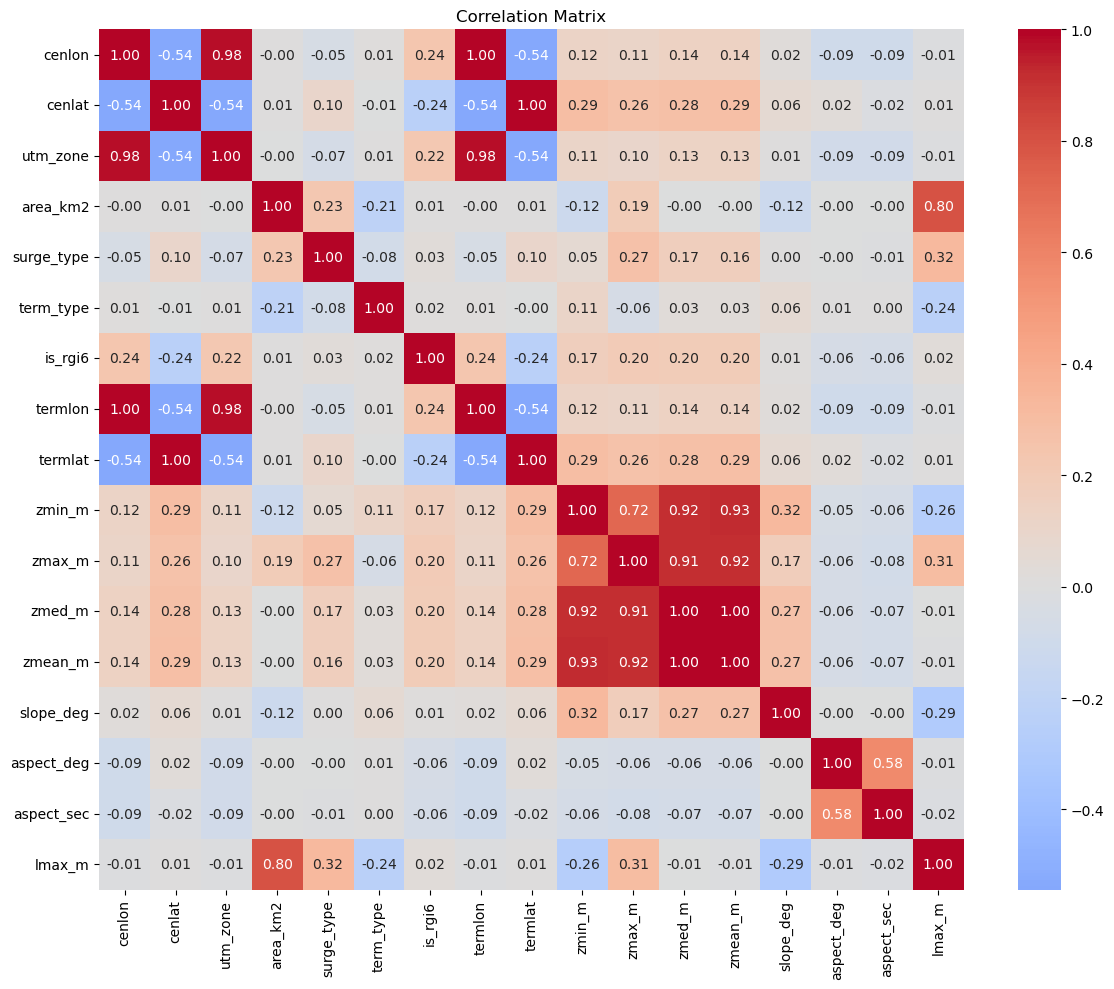

In [14]:
# make a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

We are interested in running PCA on termlon, zmean_m, aspect_deg, area_km2, and slope_deg because these may be important for glacier boundary data, see markdown file. 

## We create a few visualizations of our selected variables

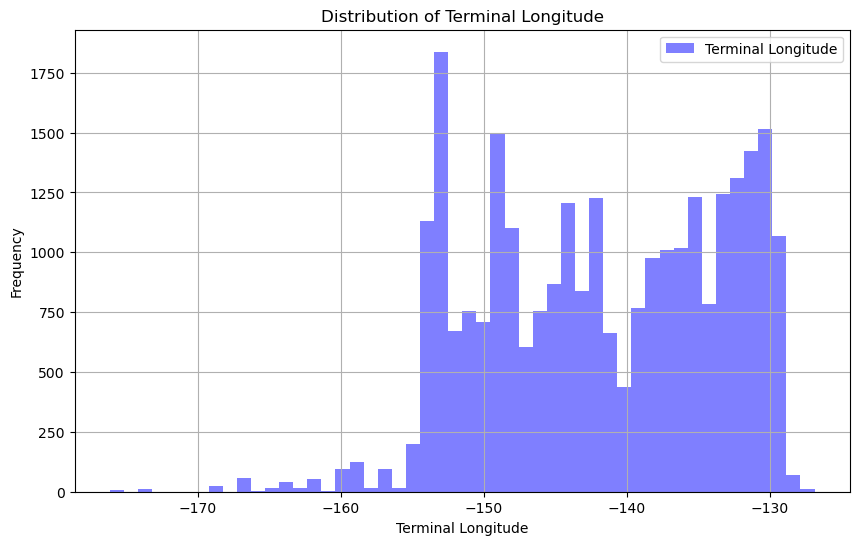

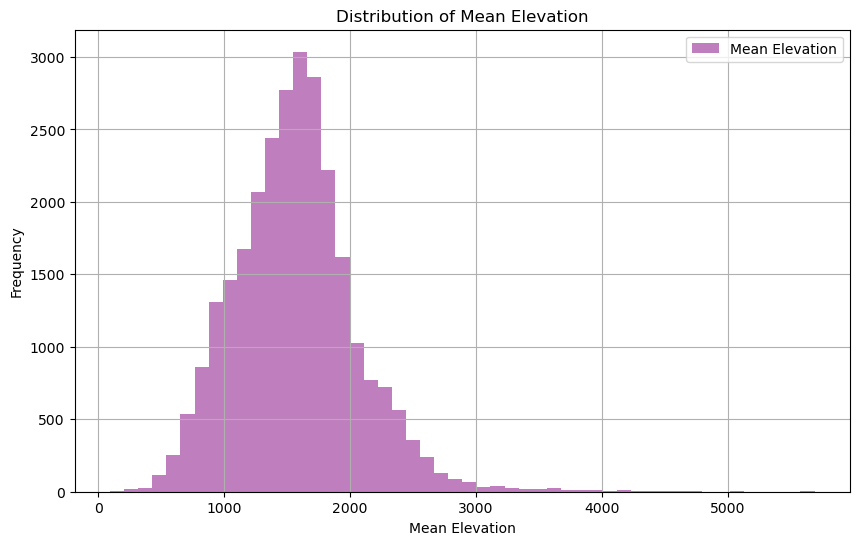

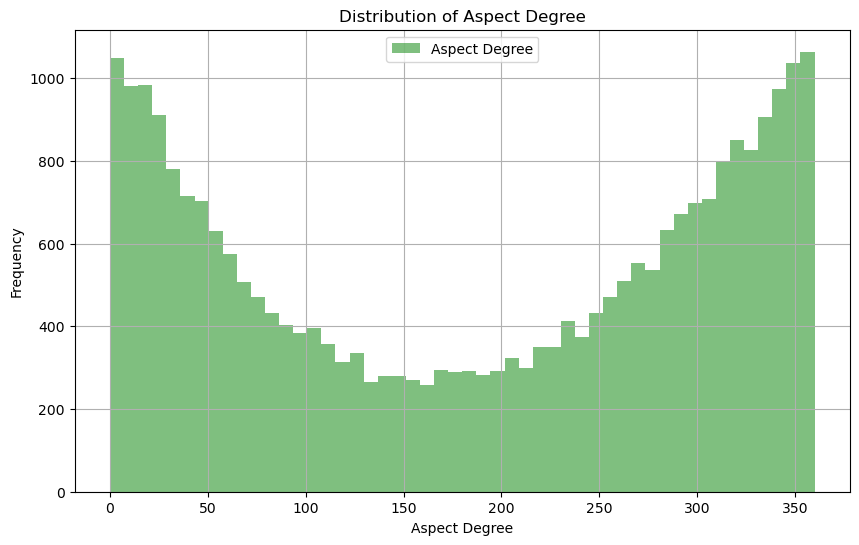

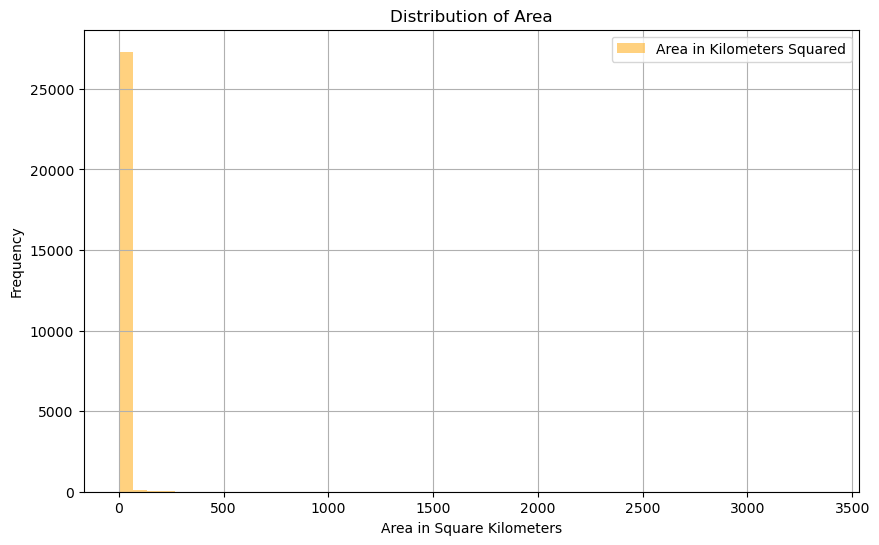

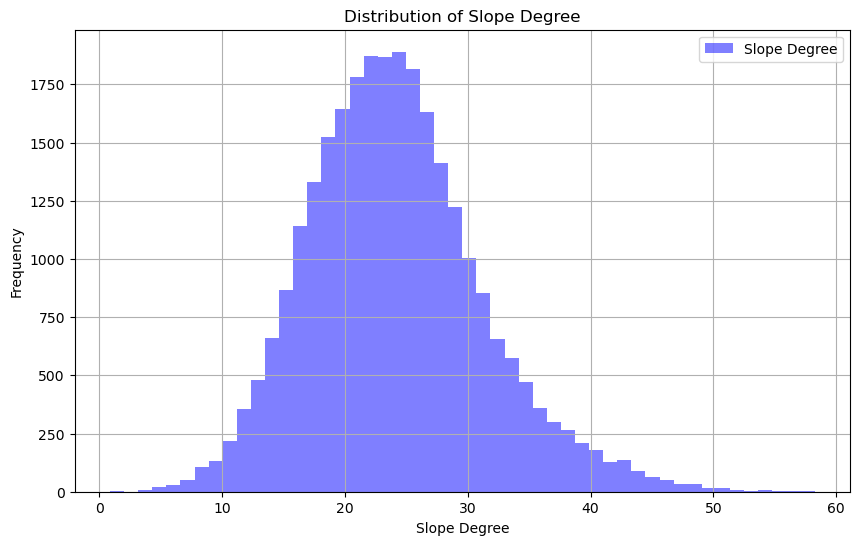

In [37]:
# Plot histograms of selected features
plt.figure(figsize=(10,6))
plt.hist(df['termlon'], bins = 50, color = 'blue', label = "Terminal Longitude", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['zmean_m'], bins = 50, color = 'purple', label = "Mean Elevation", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Mean Elevation")
plt.xlabel("Mean Elevation")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['aspect_deg'], bins = 50, color = 'green', label = "Aspect Degree", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Aspect Degree")
plt.xlabel("Aspect Degree")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df['area_km2'], bins = 50, color = 'orange', label = "Area in Kilometers Squared", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Area")
plt.xlabel("Area in Square Kilometers")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['slope_deg'], bins = 50, color = 'blue', label = "Slope Degree", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Slope Degree")
plt.xlabel("Slope Degree")
plt.ylabel("Frequency")
plt.show()

Something is happening with the area feature. Examine in more detail. 

3362.6464471982194


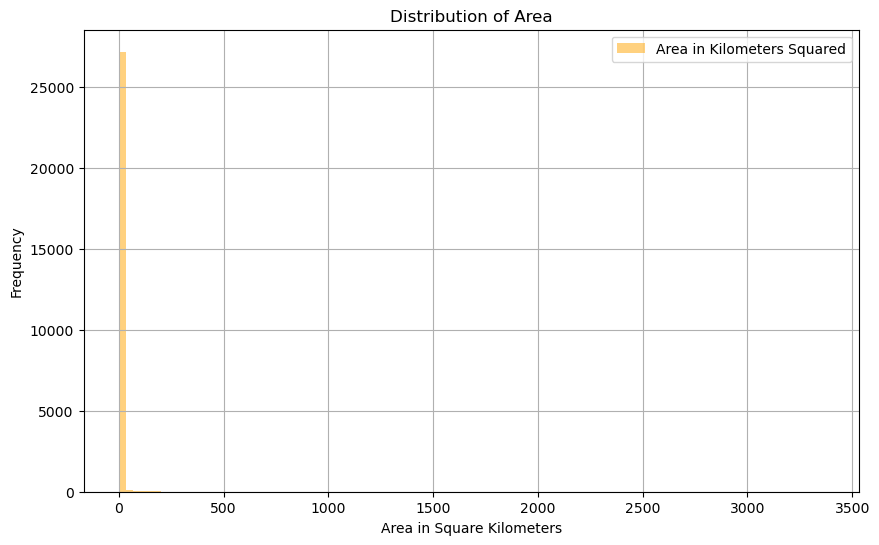

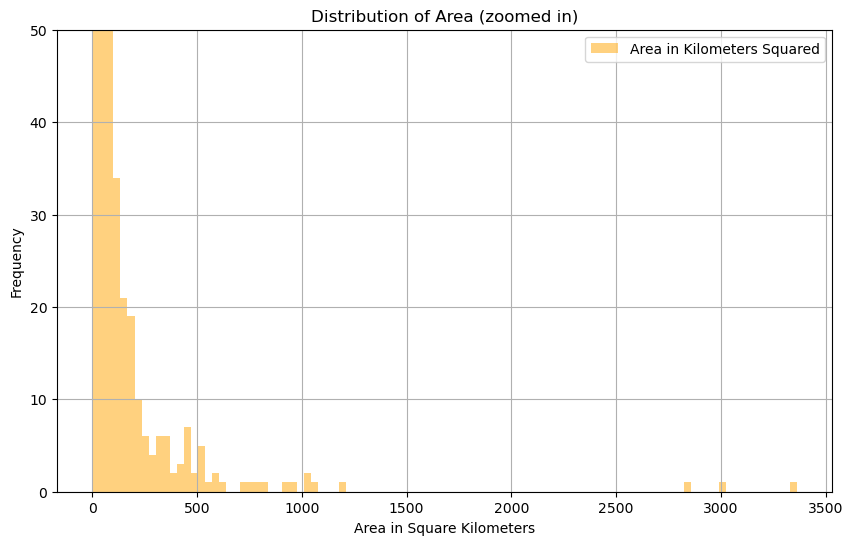

In [38]:
print(numeric_df_clean['area_km2'].max() - numeric_df_clean['area_km2'].min())
# There is a large spread of data. Perhaps we could visualize with more bins or a scatterplot

plt.figure(figsize=(10,6))
plt.hist(df['area_km2'], bins = 100, color = 'orange', label = "Area in Kilometers Squared", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Area")
plt.xlabel("Area in Square Kilometers")
plt.ylabel("Frequency")
plt.show()

#Zoom in a bit
plt.figure(figsize=(10,6))
plt.hist(df['area_km2'], bins = 100, color = 'orange', label = "Area in Kilometers Squared", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Area (zoomed in)")
plt.xlabel("Area in Square Kilometers")
plt.ylim(0, 50)
plt.ylabel("Frequency")
plt.show()

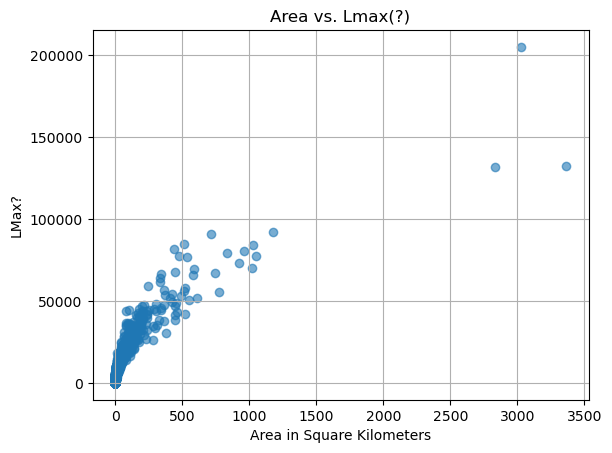

In [95]:
# Plot lmax_m vs. area as these are correlated
plt.figure()
plt.scatter(df['area_km2'], df['lmax_m'], alpha = 0.6)
plt.grid()
plt.title("Area vs. Lmax(?)")
plt.xlabel("Area in Square Kilometers")
plt.ylabel("LMax?")
plt.show()

#It looks like there are 3 posssible outliers. It may be worth removing them.

In [10]:
# Select only the features we want for PCA
features_for_pca = ['slope_deg', 'aspect_deg', 'zmean_m', 'zmin_m', 'zmax_m', 'termlon','termlat', 'area_km2','lmax_m']
#features_for_pca = ['slope_deg',  'zmean_m', 'zmin_m', 'zmax_m']
pca_data = numeric_df_clean[features_for_pca]
#Then, drop entries with NaN values
pca_data = pca_data.dropna()
pca_data


,slope_deg,aspect_deg,zmean_m,zmin_m,zmax_m,termlon,termlat,area_km2,lmax_m
0,17.606613,342.330469,1553.94030,1485.31760,1693.62350,-155.904032,67.416034,0.239199,725
1,19.846369,345.367012,1330.91500,1278.40060,1394.76570,-155.878512,67.421273,0.104641,484
2,23.690063,13.467490,1437.23520,1294.70340,1704.74200,-155.529516,67.435694,0.216605,1099
3,12.782562,42.854332,1249.06620,1224.17880,1286.89770,-155.502283,67.433367,0.252649,652
4,17.148510,299.058193,1273.78340,1052.44010,1488.12990,-155.499392,67.438901,0.474716,1903
...,...,...,...,...,...,...,...,...,...
27504,30.104969,24.649687,1956.88500,1856.43870,2095.01120,-127.940038,58.382501,0.190275,757
27505,28.225796,85.414560,2041.02940,1871.68970,2229.32130,-127.986927,58.372995,0.230076,915
27506,26.389137,348.349361,1907.25850,1762.79870,2032.12080,-128.006498,58.383243,0.187298,714
27507,25.529028,70.835080,2120.08740,1982.91860,2225.51100,-128.140327,58.381107,0.152301,489


In [11]:
# Now that we've selected the features, we center the data in each column


glacier_centered = pca_data - pca_data.mean()


In [12]:
# Then, we perform PCA via the SVD, as shown in class

# Apply SVD to perform PCA 
U, S, Vt = np.linalg.svd(glacier_centered, full_matrices=False)

# Project data onto principal components (scores)
pca_result = U * S

# Calculate explained variance ratio
explained_variance = (S ** 2) / (len(glacier_centered) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# What proportion is variance is explained by each PC?
print("Explained variance:")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Explained variance:
  PC1: 0.9556 (95.56%)
  PC2: 0.0414 (4.14%)
  PC3: 0.0019 (0.19%)
  PC4: 0.0009 (0.09%)
  PC5: 0.0001 (0.01%)
  PC6: 0.0000 (0.00%)
  PC7: 0.0000 (0.00%)
  PC8: 0.0000 (0.00%)
  PC9: 0.0000 (0.00%)


Note that almost all of our variance in the data is explained by the first principal component! In fact, basically all variance is covered by the first two. We examine these in detail. 

First, we produce a scree plot for the data. This shows visually how much variance is explained by each PC. 

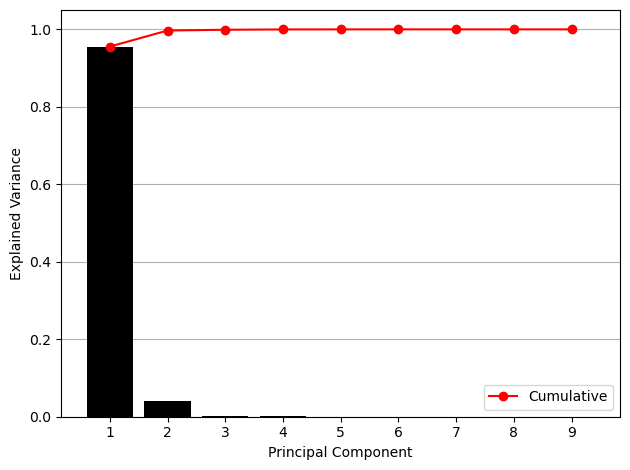

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [99]:
fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
       color='black')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 
        'ro-', label='Cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()
plt.figure()


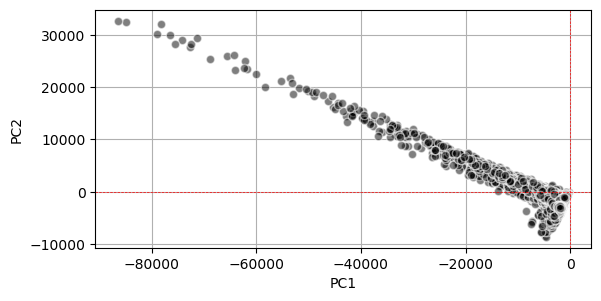

In [119]:
fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='k', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
plt.show()

In [13]:
# What makes up each PC?

# Loadings (principal component vectors) are the rows of Vt
loading_PC1 = Vt[0, :]
loading_PC2 = Vt[1, :]
print("Loading for PC1:")
print(loading_PC1)
print()
print("Loading for PC2:")
print(loading_PC2)

Loading for PC1:
[ 5.11710708e-04  3.46195195e-04  8.72128475e-04  3.14048041e-02
 -4.19269373e-02  1.56319157e-05 -6.08366297e-06 -8.11558335e-03
 -9.98593443e-01]

Loading for PC2:
[-2.32354493e-03  8.81132654e-03 -5.77378420e-01 -5.48518980e-01
 -6.04662945e-01 -1.29114024e-03 -8.60625934e-04 -2.23365602e-04
  7.63638639e-03]


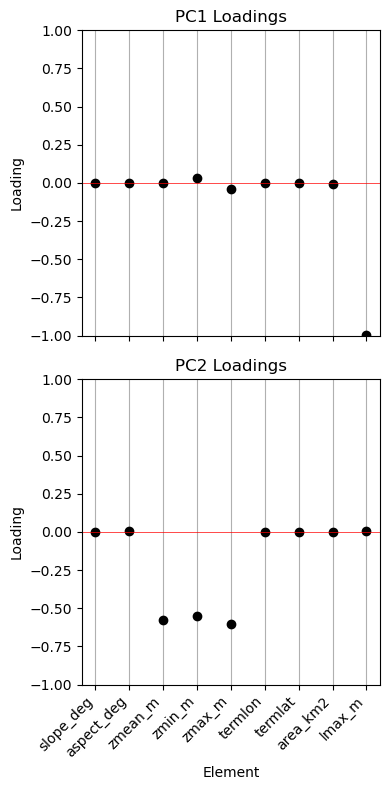

In [103]:
# Why don't we visualize these loadings?
fig, axes = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
x = np.arange(9)
latex_cols = ['slope_deg', 'aspect_deg', 'zmean_m', 'zmin_m', 'zmax_m', 'termlon','termlat', 'area_km2']

# PC1 loadings
ax1 = axes[0]
ax1.scatter(x, loading_PC1, color='black')
ax1.set_ylabel('Loading')
ax1.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
ax1.grid(True, axis='x')
ax1.set_axisbelow(True)
ax1.set_title('PC1 Loadings')

# PC2 loadings
ax2 = axes[1]
ax2.scatter(x, loading_PC2, color='black')
ax2.set_ylabel('Loading')
ax2.set_xlabel('Element')
ax2.set_xticks(x)
ax2.set_xticklabels(features_for_pca, rotation=45, ha='right')
ax2.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax2.set_ylim(-1, 1)
ax2.grid(True, axis='x')
ax2.set_axisbelow(True)
ax2.set_title('PC2 Loadings')

plt.tight_layout()
plt.show()

In [109]:
# Try removing the 3 outliers
pca_data['lmax_m'].nlargest(10)

13484    204932
15260    132583
15350    131477
16821     92254
13665     90696
13098     84492
6337      84371
14766     82022
16316     80416
13270     79565
Name: lmax_m, dtype: int64

In [110]:
pca_outliers_removed = pca_data.drop(index = [13484, 15260, 15350])
pca_outliers_removed

,slope_deg,aspect_deg,zmean_m,zmin_m,zmax_m,termlon,termlat,area_km2,lmax_m
0,17.606613,342.330469,1553.94030,1485.31760,1693.62350,-155.904032,67.416034,0.239199,725
1,19.846369,345.367012,1330.91500,1278.40060,1394.76570,-155.878512,67.421273,0.104641,484
2,23.690063,13.467490,1437.23520,1294.70340,1704.74200,-155.529516,67.435694,0.216605,1099
3,12.782562,42.854332,1249.06620,1224.17880,1286.89770,-155.502283,67.433367,0.252649,652
4,17.148510,299.058193,1273.78340,1052.44010,1488.12990,-155.499392,67.438901,0.474716,1903
...,...,...,...,...,...,...,...,...,...
27504,30.104969,24.649687,1956.88500,1856.43870,2095.01120,-127.940038,58.382501,0.190275,757
27505,28.225796,85.414560,2041.02940,1871.68970,2229.32130,-127.986927,58.372995,0.230076,915
27506,26.389137,348.349361,1907.25850,1762.79870,2032.12080,-128.006498,58.383243,0.187298,714
27507,25.529028,70.835080,2120.08740,1982.91860,2225.51100,-128.140327,58.381107,0.152301,489


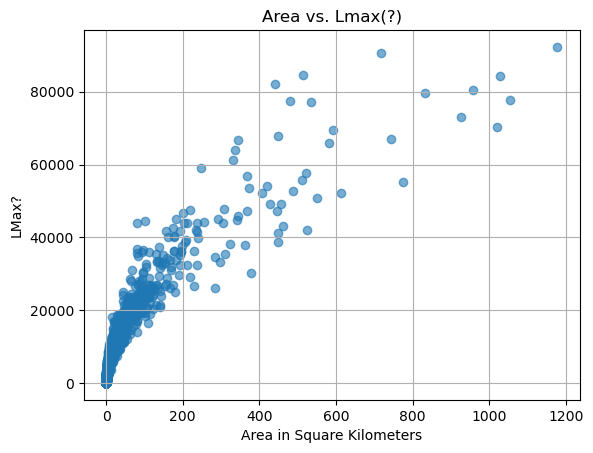

In [111]:
# Plot a scatterplot again
plt.figure()
plt.scatter(pca_outliers_removed['area_km2'], pca_outliers_removed['lmax_m'], alpha = 0.6)
plt.grid()
plt.title("Area vs. Lmax(?)")
plt.xlabel("Area in Square Kilometers")
plt.ylabel("LMax?")
plt.show()

In [113]:
#Do PCA again

# Now that we've selected the features, we center the data in each column


no_outliers_centered = pca_outliers_removed - pca_outliers_removed.mean()

# Then, we perform PCA via the SVD, as shown in class

# Apply SVD to perform PCA 
U, S, Vt = np.linalg.svd(pca_outliers_removed, full_matrices=False)

# Project data onto principal components (scores)
pca_result = U * S

# Calculate explained variance ratio
explained_variance = (S ** 2) / (len(pca_outliers_removed) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

# What proportion is variance is explained by each PC?
print("Explained variance:")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")


Explained variance:
  PC1: 0.7535 (75.35%)
  PC2: 0.2443 (24.43%)
  PC3: 0.0013 (0.13%)
  PC4: 0.0008 (0.08%)
  PC5: 0.0001 (0.01%)
  PC6: 0.0001 (0.01%)
  PC7: 0.0000 (0.00%)
  PC8: 0.0000 (0.00%)
  PC9: 0.0000 (0.00%)


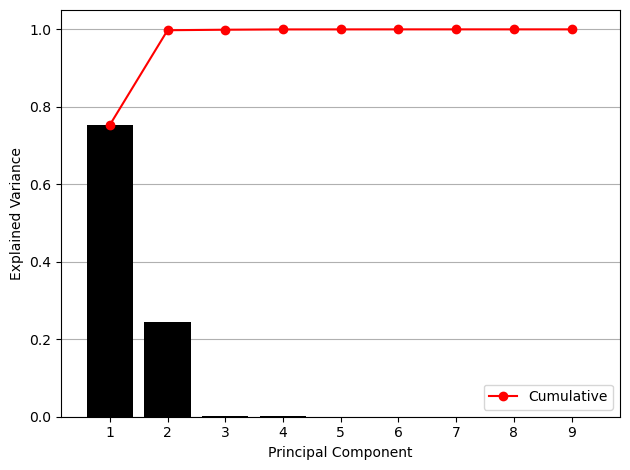

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [116]:
fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 
       color='black')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 
        'ro-', label='Cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis='y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()
plt.figure()


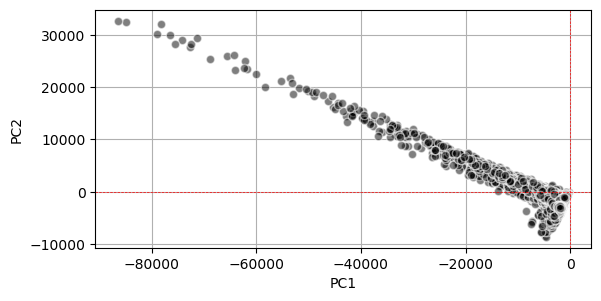

In [118]:
fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color='k', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)
plt.show()